In [521]:
import pandas as pd
import plotly.express as px
import numpy as np
import re

In [522]:
df = pd.read_csv('../data/raw_data.csv')

In [523]:
len(df)  # 370 rows supposed to correspond to a job

370

In [524]:
len(pd.unique(df.description))  # only 236 unique job descriptions so there must be duplicates in the data

236

### Deletion of duplicates 

In [525]:
# Find a duplicate rows
duplicateDFRow = df[df.duplicated()]
len(duplicateDFRow)  # there are 133 duplicated in the data

133

In [526]:
df.drop(duplicateDFRow.index, inplace=True)
len(df)

237

In [527]:
df.head()

,title,company,city,contract_type,salary,description
0,Data Scientist F/H,Malakoff Humanis,Paris (75),CDI,-,Société\n\nASSOCIATION DE MOYENS ASSURANCE DE ...
1,Data Scientist H/F,Atos,Montpellier (34),-,-,À propos d’Atos\n\nAtos est un leader internat...
2,Data Analyst Marketing,Talent Partners,34000 Montpellier,"- Temps plein, CDI",40 000 € par an,NOTRE CLIENT EN QUELQUES MOTS✲ Secteur de l'IT...
3,Data Scientist - COPERNEEC,Coperneec,Paris (75),-,-,Data Scientist - COPERNEEC\nA propos de Copern...
4,Data Scientist,Avisto,06220 Vallauris,"Temps plein, CDI",-,"Dans le cadre de nos activités, vous serez ame..."


### City 

In [528]:
pd.unique(df.city)

array(['Paris (75)', 'Montpellier (34)', '34000 Montpellier',
       '06220 Vallauris', 'Rennes (35)', '47000 Agen', '94300 Vincennes',
       '13590 Meyreuil', 'Paris 15e (75)', 'Saint-Malo (35)',
       'Villeurbanne (69)', 'La Défense (92)', '75116 Paris 16e',
       'Clichy (92)', 'Rungis (94)', 'Guyancourt (78)',
       'Neuilly-sur-Seine (92)', 'Eu (76)', '17000 La Rochelle',
       '92400 Courbevoie', 'Amiens (80)', '92300 Levallois-Perret',
       '75013 Paris 13e', 'Magny-les-Hameaux (78)', '91940 Les Ulis',
       '44000 Nantes', 'Toulouse (31)', '06560 Valbonne',
       'Courbevoie (92)', '87000 Limoges', 'Tourcoing (59)',
       '92800 Puteaux', 'Lyon (69)', 'Télétravail', 'Gennevilliers (92)',
       'Nantes (44)', 'Paris 14e (75)', 'Paris 13e (75)', 'Meudon (92)',
       'Bordeaux (33)', '14000 Caen', '34095 Montpellier',
       'Aix-en-Provence (13)', '92210 Saint-Cloud',
       'Fontenay-sous-Bois (94)', '74650 Chavanod', 'Paris 2e (75)',
       'Clermont-Ferrand (63)',

We want to clean the city variable by removing the postal code data and keeping only the city name \
We do this by keeping only the characters that are letters or - sign

In [529]:
# takes a string and returns the same strings but only with characters that are letters (or - sign)
def get_letters(value):
    return ''.join([i for i in value if (i.isalpha()) | (i=='-') | (i==' ') | (i=="'")])

In [530]:
#clean the city variable, by removing the postal codes or parentheses
df['city_letters'] = df.city.apply(get_letters)

In [531]:
pd.unique(df.city_letters)

array(['Paris ', 'Montpellier ', ' Montpellier', ' Vallauris', 'Rennes ',
       ' Agen', ' Vincennes', ' Meyreuil', 'Paris e ', 'Saint-Malo ',
       'Villeurbanne ', 'La Défense ', ' Paris e', 'Clichy ', 'Rungis ',
       'Guyancourt ', 'Neuilly-sur-Seine ', 'Eu ', ' La Rochelle',
       ' Courbevoie', 'Amiens ', ' Levallois-Perret',
       'Magny-les-Hameaux ', ' Les Ulis', ' Nantes', 'Toulouse ',
       ' Valbonne', 'Courbevoie ', ' Limoges', 'Tourcoing ', ' Puteaux',
       'Lyon ', 'Télétravail', 'Gennevilliers ', 'Nantes ', 'Meudon ',
       'Bordeaux ', ' Caen', 'Aix-en-Provence ', ' Saint-Cloud',
       'Fontenay-sous-Bois ', ' Chavanod', 'Clermont-Ferrand ',
       'Nanterre ', "Marcy-l'Étoile ", 'Saint-Maurice ', ' Toulouse',
       'Issy-les-Moulineaux ', 'Bondoufle ', 'Caen ', ' Meudon',
       'Lyon er ', ' Villejuif', 'Châtellerault ', 'Lyon e ', 'Grenoble ',
       'Brétigny-sur-Orge ', 'Maisons-Alfort ', 'Villeneuve-la-Garenne ',
       ' Saint-Maurice', 'Illkirch-Graf

With cities with districts, we lost this information but letters can still be in the city name \
For these cities, we fix it by replacing by the name of the city when it's found in the variable

In [532]:
# Paris
paris_indices = df.loc[df.city_letters.str.contains('Paris', case=False)].index
df.loc[paris_indices, "city_letters"] = ["Paris"]*len(paris_indices)

# Marseille
marseille_indices = df.loc[df.city_letters.str.contains('Marseille', case=False)].index
df.loc[marseille_indices, "city_letters"] = ["Marseille"]*len(marseille_indices)

# Lyon
lyon_indices = df.loc[df.city_letters.str.contains('Lyon', case=False)].index
df.loc[lyon_indices, 'city_letters'] = ["Lyon"]*len(lyon_indices)

In [533]:
# city that starts or ends with a space --> we remove this space
# ^\s for start
# \s$ for end with a space
df.city_letters.replace('^\s','',regex=True, inplace = True)
df.city_letters.replace('\s$', '', regex=True, inplace=True)

### Contract type 

In [534]:
pd.unique(df.contract_type)

array(['CDI', '-', ' -  Temps plein, CDI', 'Temps plein, CDI',
       'Apprentissage, Contrat pro', 'Stage', 'CDD', 'CDD, CDI',
       'Temps plein, Stage', 'Temps partiel',
       'Temps plein, Temps partiel', ' -  Temps plein, CDD',
       'Freelance / Indépendant', 'Temps plein, CDD', ' -  CDI',
       ' -  Intérim', 'Temps plein, Intérim', 'Intérim'], dtype=object)

#### CDI 

In [535]:
cdi_indices = df.loc[df['contract_type'].str.contains("CDI", case=False)].index
df.loc[cdi_indices, "contract_type"] = ["CDI"]*len(cdi_indices)

#### Apprentissage

In [536]:
student_indices = df.loc[(df['contract_type'].str.contains("Apprentissage", case=False)) | df.contract_type.str.contains("Stage", case=False)].index
df.drop(student_indices, inplace=True)  # we are not interested in this type of contract, 34 rowd

#### Intérim

In [537]:
interim_indices = df.loc[df['contract_type'].str.contains("Intérim", case=False)].index
df.loc[interim_indices, "contract_type"] = ["Intérim"]*len(interim_indices)

In [538]:
pd.unique(df.contract_type)

array(['CDI', '-', 'CDD', 'Temps partiel', 'Temps plein, Temps partiel',
       ' -  Temps plein, CDD', 'Freelance / Indépendant',
       'Temps plein, CDD', 'Intérim'], dtype=object)

#### CDD

In [539]:
cdd_indices = df.loc[df['contract_type'].str.contains("CDD", case=False)].index
df.loc[cdd_indices, 'contract_type'] = ["CDD"]*len(cdd_indices)

In [540]:
# lines where it's not specified will be represented with '-'
unspec_indices = df.loc[df.contract_type.str.contains("Temps partiel", case=False)].index
df.loc[unspec_indices, 'contract_type'] = ["-"]*len(unspec_indices)

#### Freelance 

In [541]:
# as I'm searching for a first job, I am not looking at freelandce opportunities
freelance_indices = df.loc[df.contract_type.str.contains("Freelance", case=False)].index
df.drop(freelance_indices, inplace=True)

### Salary 

In [542]:
pd.unique(df.salary)

array(['-', '40\xa0000 € par an', '2\xa0750 € par mois',
       '3\xa0000 € par mois', '38\xa0000 € par an',
       '50\xa0000 € - 60\xa0000 € par an',
       '2\xa0053 € - 4\xa0211 € par mois',
       '36\xa0000 € - 38\xa0000 € par an',
       '40\xa0000 € - 55\xa0000 € par an',
       '35\xa0000 € - 40\xa0000 € par an',
       '35\xa0000 € - 38\xa0000 € par an',
       '30\xa0000 € - 40\xa0000 € par an',
       '50\xa0000 € - 80\xa0000 € par an',
       '45\xa0000 € - 55\xa0000 € par an',
       '35\xa0000 € - 45\xa0000 € par an', '550 € - 600 € par jour',
       '40\xa0000 € - 50\xa0000 € par an', '3\xa0624 € par mois',
       '60\xa0000 € - 70\xa0000 € par an', '3\xa0300 € par mois',
       '38\xa0000 € - 45\xa0000 € par an', '36\xa0731 € par an',
       '55\xa0000 € - 65\xa0000 € par an', '200 € - 400 € par jour',
       '200 € - 430 € par jour'], dtype=object)

Most salaries are not fixed, but an interval is given \
To be able to compare salaries, we will replace it by the interval mean \
We will also convert monthly salaries to yearly

#### From monthly to yearly 

In [543]:
# when salary is given per month, we want to calculate it by year
month_salary_info = df.loc[df.salary.str.contains('par mois', case=False)].salary

In [544]:
# takes a string and returns the same strings but only with characters that are numeric
def get_numbers(value):
    return ''.join([i for i in value if i.isnumeric()])

In [545]:
def get_interval_mean(value):
    # value is a string containing a salary interval, e.g. "30 000 € - 40 000 €"
    
    res = value.split('-')
    first = int(get_numbers(res[0]))
    last = int(get_numbers(res[1]))
    return (first+last)/2

In [546]:
def monthly_to_annual(value):
    if '-' in value:
        return str(get_interval_mean(value)*12)
    else:  # salary is fixed
        return str(int(get_numbers(value))*12)

In [547]:
month_salary_info = month_salary_info.apply(monthly_to_annual)

# replace in the dataframe
df.loc[month_salary_info.index, "salary"] = month_salary_info

In [548]:
print(pd.unique(df.salary))

['-' '40\xa0000 € par an' '33000' '36000' '38\xa0000 € par an'
 '50\xa0000 € - 60\xa0000 € par an' '37584.0'
 '36\xa0000 € - 38\xa0000 € par an' '40\xa0000 € - 55\xa0000 € par an'
 '35\xa0000 € - 40\xa0000 € par an' '35\xa0000 € - 38\xa0000 € par an'
 '30\xa0000 € - 40\xa0000 € par an' '50\xa0000 € - 80\xa0000 € par an'
 '45\xa0000 € - 55\xa0000 € par an' '35\xa0000 € - 45\xa0000 € par an'
 '550 € - 600 € par jour' '40\xa0000 € - 50\xa0000 € par an' '43488'
 '60\xa0000 € - 70\xa0000 € par an' '39600'
 '38\xa0000 € - 45\xa0000 € par an' '36\xa0731 € par an'
 '55\xa0000 € - 65\xa0000 € par an' '200 € - 400 € par jour'
 '200 € - 430 € par jour']


#### Daily salary 

In [549]:
# when salary is daily, it is a freelance contract, that wasn't specified in the contract type variable
# so we drop ir
daily_indices = df.loc[df.salary.str.contains('par jour', case=False)].index
df.drop(daily_indices, inplace=True)

#### From interval to mean for the salaries that were given yearly

In [550]:
# salaries that contain 'par an' have not been touched yet
annual_to_clean = df.loc[df.salary.str.contains('par an', case=False)].salary

In [551]:
def clean_annual_salary(value):

    if '-' in value:  # salary is given as an interval
        return str(get_interval_mean(value))
    else:  # salary is fixed
        return get_numbers(value)

In [552]:
annual_to_clean = annual_to_clean.apply(clean_annual_salary)
df.loc[annual_to_clean.index, 'salary'] = annual_to_clean

### Job title 

In [553]:
pd.unique(df.title)
# offers to drop : 
# Senior
# Principal
# Docteur
# PhD
# Lead
# freelance
# apprenticeship
# responsable
# postdoctoral, chef de projet, directeur

array(['Data Scientist F/H', 'Data Scientist H/F',
       'Data Analyst Marketing', 'Data Scientist - COPERNEEC',
       'Data Scientist', 'CDI - Data Scientist - Yves Rocher F/H',
       'Data scientist Junior F/H',
       'Consultante - Consultant data scientist Sofrecom',
       'Ingénieur(e) modélisation data scientist', 'Data scientist F/H',
       'Junior Data Scientist - 1 year apprenticeship - January 2022',
       'Data Scientist Junior (h/f)', 'Data Scientist (H/F)',
       'DATA SCIENTIST', 'Jeune docteur Data scientist',
       'Data scientist H/F',
       'Data Scientist - Demande de dérogation recrutement externe H/F',
       'Consultant(e) Data Science - Bureau de Nantes',
       'DATA ANALYST (H/F)', 'Data scientist (H/F)',
       'Ingénieur en science des données / Data Scientist H/F',
       'Data analyste bac+4/5- SODA Montpellier - specialist -CDD - H/F',
       'Data Scientist Cyber Security (h/f)', 'Data Scientist F/H - CDI',
       'Data Scientist (H/F) | POEI', 

In [554]:
drop_titles =['senior', 'principal', 'docteur', 'phd', 'lead', 'freelance', 'apprenticeship',
             'responsable', 'postdoctoral', 'chef de projet', 'directeur']

pattern = '|'.join(drop_titles)

drop_titles_indices = df.loc[df['title'].str.contains(pattern, case=False)].index
df.drop(drop_titles_indices, inplace=True)

### Clean the description 

In [555]:
def clean_description(value):
    # value is a string containing description
    
    res = ' '.join(value.split('\n'))
    return res

In [556]:
df['description_clean'] = df.description.apply(clean_description)

### Skills

Using the job description, we will build binary variables that will indicate for each skill if it is required for the job

In [557]:
skills = ['bi', 'datavisualisation', 'statistique', 'machine learning', 'reporting', 'big data', 'cnn', 'knn',
         'dashboard', 'anglais', 'apprentissage par renforcement', 'reinforcment learning', 'IA', 'deep learning',
         "traitement d'images", 'agile', 'time series', 'séries temporelles', 'graph', 'supervisé', 'non supervisé',
          "reconnaissance d'images", 'nlp', 'natural language processing', 'classification', 'optimisation',
          'prédiction', 'elasticsearch', 'kibana', 'xgboost', 'données géographiques', 'ocr', 'bayesian', 'bayes',
          'random forest', 'neural network', 'réseau de neurones', 'computer vision', 'a/b', 'data mining'
         ]

tools = ['r', 'python', 'julia', 'power bi', 'sql', 'tableau software', 'qlik', 'pack office', 'pandas',
        'sas', 'scikit-learn', 'sklearn', 'tensorflow', 'keras', 'C++', 'git', 'airflow', 'mongodb', 'VBA', 'java',
         'linux', 'scala', 'pytorch', 'keras', 'numpy', 'gensim', 'cloud', 'hadoop', 'pyspark', 'docker', 'aws',
         'nosql', 'matlab', 'matplotlib', 'jupyter', 'shiny', 'knitr', 'caret', 'plotly', 'mlr', 'dplyr', 'dash'
        ]

In [558]:
# add a binary column per skill
for i in range(len(skills)):
    newvar = df.description_clean.str.contains(skills[i], case=False)
    df[f'{skills[i]}'] = newvar

In [559]:
# add a binary column per tool
for i in range(len(tools)):
    if tools[i]=="C++":
        newvar = df.description_clean.str.contains(re.escape(tools[i]), case=False)
    else:
        newvar = df.description_clean.str.contains(tools[i], case=False)
    df[f'{tools[i]}'] = newvar

### Find sub groups of jobs (DS, DA...) 

In [560]:
job_cat = ['data scientist', 'data analyst', 'data engineer']
# add a binary column per category
for i in range(len(job_cat)):
    newvar = df.title.str.contains(job_cat[i], case=False)
    df[f'{job_cat[i]}'] = newvar

### Degree level 

In [573]:
# we use regex to deal with accents etc
degree_dict = {'master':2, '[ée]cole.*ing[ée]nieur':2, 'licence':1, 'DUT':1, 'bac[ ]*\+4':2,
              'bac[ ]*\+5':2, 'bac[ ]*\+3':1}

In [574]:
# add the new column with entry 3 for each row, which will correspond to the value if no degree is specified
df['degree_level'] = [3]*len(df)

In [575]:
for key, value in degree_dict.items():
    level_indices = df.loc[df.description_clean.str.contains(key, case=False)]  # description contains master for ex.
    to_change = level_indices.loc[level_indices.degree_level > value].index  # we keep the lowest degree required
    df.loc[to_change, 'degree_level'] = [value]*len(to_change)

### Xp level 

In [ ]:
# penser à quand l'xp est en lettres

In [606]:
xp_re = r'([0-9])[ ]*(ans|années)'

In [612]:
df['xp_level'] = df.description_clean.str.extract(xp_re, flags=re.I | re.M).iloc[:, 0]

In [613]:
df.head()

,title,company,city,contract_type,salary,description,city_letters,description_clean,bi,datavisualisation,...,caret,plotly,mlr,dplyr,dash,data scientist,data analyst,data engineer,degree_level,xp_level
0,Data Scientist F/H,Malakoff Humanis,Paris (75),CDI,-,Société\n\nASSOCIATION DE MOYENS ASSURANCE DE ...,Paris,Société ASSOCIATION DE MOYENS ASSURANCE DE PE...,False,False,...,False,False,False,False,False,True,False,False,2,NaN
1,Data Scientist H/F,Atos,Montpellier (34),-,-,À propos d’Atos\n\nAtos est un leader internat...,Montpellier,À propos d’Atos Atos est un leader internatio...,True,False,...,False,False,False,False,False,True,False,False,2,NaN
2,Data Analyst Marketing,Talent Partners,34000 Montpellier,CDI,40000,NOTRE CLIENT EN QUELQUES MOTS✲ Secteur de l'IT...,Montpellier,NOTRE CLIENT EN QUELQUES MOTS✲ Secteur de l'IT...,True,False,...,False,False,False,False,False,False,True,False,2,NaN
3,Data Scientist - COPERNEEC,Coperneec,Paris (75),-,-,Data Scientist - COPERNEEC\nA propos de Copern...,Paris,Data Scientist - COPERNEEC A propos de Coperne...,True,False,...,False,False,False,False,False,True,False,False,2,NaN
4,Data Scientist,Avisto,06220 Vallauris,CDI,-,"Dans le cadre de nos activités, vous serez ame...",Vallauris,"Dans le cadre de nos activités, vous serez ame...",True,False,...,False,False,False,False,False,True,False,False,3,NaN


### Save the file 

In [614]:
df.to_csv('../data/clean_data.csv', index=False)

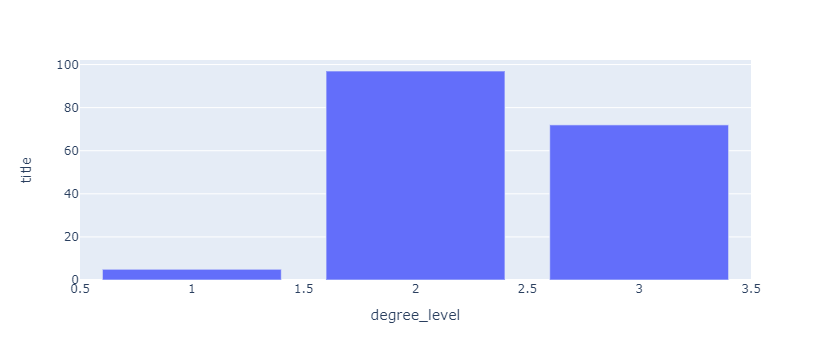

In [516]:
dfg = df.groupby('degree_level').count().reset_index()
# plot structure
fig = px.bar(dfg,
             x='degree_level',
             y='title',
             title='',
             barmode='stack')

# plot
fig.show()